# Understanding the Problem

Credit card fraud detection involves identifying fraudulent transactions from a pool of legitimate transactions. The main objective of this project is to find the best model that can detect fraudulent transactions.

# Import the libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Loading the dataset

In [3]:
data = pd.read_csv('C:/Users/Dell/Documents/archive/creditcard_2023.csv')
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


# Understanding the dataset

id: Unique identifier for each transaction

V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc.)

Amount: The transaction amount

Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)

# Dataset information and its structure

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [5]:
print(data.shape)
print(data.describe())

(568630, 31)
                  id            V1            V2            V3            V4  \
count  568630.000000  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   284314.500000 -5.638058e-17 -1.319545e-16 -3.518788e-17 -2.879008e-17   
std    164149.486121  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min         0.000000 -3.495584e+00 -4.996657e+01 -3.183760e+00 -4.951222e+00   
25%    142157.250000 -5.652859e-01 -4.866777e-01 -6.492987e-01 -6.560203e-01   
50%    284314.500000 -9.363846e-02 -1.358939e-01  3.528579e-04 -7.376152e-02   
75%    426471.750000  8.326582e-01  3.435552e-01  6.285380e-01  7.070047e-01   
max    568629.000000  2.229046e+00  4.361865e+00  1.412583e+01  3.201536e+00   

                 V5            V6            V7            V8            V9  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   7.997245e-18 -3.958636e-17 -3.198898e-17  2.109273e-17  3.998623e-17   
std    1.000001e+00  1.000001

# Check for missing values in each column

In [6]:
data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Distribution of legit and fraudulent transaction

In [7]:
data['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

This dataset is balanced

0---> Normal transaction

1---> Fraudulent transaction

In [8]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

In [9]:
print(fraud.shape)
print(valid.shape)

(284315, 31)
(284315, 31)


# Statistical measures of data

In [10]:
print("Details of the fraudulent transaction")
fraud.Amount.describe()

Details of the fraudulent transaction


count    284315.000000
mean      12057.601763
std        6909.750891
min          50.010000
25%        6074.640000
50%       12062.450000
75%       18033.780000
max       24039.930000
Name: Amount, dtype: float64

In [11]:
print("Details of valid transaction")
valid.Amount.describe()

Details of valid transaction


count    284315.000000
mean      12026.313506
std        6929.500715
min          50.120000
25%        6034.540000
50%       11996.900000
75%       18040.265000
max       24039.930000
Name: Amount, dtype: float64

# Compare the values for both transactions

In [12]:
data.groupby('Class').mean()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,142442.987714,0.505761,-0.491878,0.682095,-0.735981,0.338639,0.435088,0.491234,-0.144294,0.585522,...,-0.179851,-0.10964,-0.014098,-0.010255,0.130107,-0.061847,-0.071052,-0.214002,-0.102024,12026.313506
1,426186.012286,-0.505761,0.491878,-0.682095,0.735981,-0.338639,-0.435088,-0.491234,0.144294,-0.585522,...,0.179851,0.10964,0.014098,0.010255,-0.130107,0.061847,0.071052,0.214002,0.102024,12057.601763


# Split the data into features and targets

In [13]:
x=data.drop(columns= 'Class', axis=1)
y=data['Class']

In [14]:
print(x)

            id        V1        V2        V3        V4        V5        V6  \
0            0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898   
1            1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605   
2            2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481   
3            3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312   
4            4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549   
...        ...       ...       ...       ...       ...       ...       ...   
568625  568625 -0.833437  0.061886 -0.899794  0.904227 -1.002401  0.481454   
568626  568626 -0.670459 -0.202896 -0.068129 -0.267328 -0.133660  0.237148   
568627  568627 -0.311997 -0.004095  0.137526 -0.035893 -0.042291  0.121098   
568628  568628  0.636871 -0.516970 -0.300889 -0.144480  0.131042 -0.294148   
568629  568629 -0.795144  0.433236 -0.649140  0.374732 -0.244976 -0.603493   

              V7        V8        V9  ...       V20       V21  

In [15]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64


# Split the data into training data and testing data

In [16]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, stratify=y, random_state = 2)

In [17]:
print(x.shape,xTrain.shape,xTest.shape)

(568630, 30) (454904, 30) (113726, 30)


# Logistic Regression

Model training and evaluation

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_model =LogisticRegression()
lr_model.fit(xTrain, yTrain)

xTrain_pred=lr_model.predict(xTrain)
training_accuracy_lr=accuracy_score(xTrain_pred, yTrain)

print("Training Accuracy (Logistic Regression):", training_accuracy_lr)

xTest_pred=lr_model.predict(xTest)
testing_accuracy_lr=accuracy_score(xTest_pred, yTest)

print("Testing Accuracy (Logistic Regression):", testing_accuracy_lr)

Training Accuracy (Logistic Regression): 0.791257056433885
Testing Accuracy (Logistic Regression): 0.7913317974781492


# Random Forest Classifier

Model training and evaluation

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(xTrain, yTrain)


xTrain_pred=rf_model.predict(xTrain)
training_accuracy_rf=accuracy_score(xTrain_pred, yTrain)

print("Training Accuracy (Random Forest Classifier):", training_accuracy_rf)

xTest_pred=rf_model.predict(xTest)
testing_accuracy_rf=accuracy_score(xTest_pred, yTest)

print("Testing Accuracy (Random Forest Classifier):", testing_accuracy_rf)


Training Accuracy (Random Forest Classifier): 0.9998285352513937
Testing Accuracy (Random Forest Classifier): 0.9997098288869739


# Decision Tree Classifier

Model training and evaluation

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt_model.fit(xTrain, yTrain)

xTrain_pred=dt_model.predict(xTrain)
training_accuracy_dt=accuracy_score(xTrain_pred, yTrain)

print("Training Accuracy (Decision Tree Classifier):", training_accuracy_dt)

xTest_pred=dt_model.predict(xTest)
testing_accuracy_dt=accuracy_score(xTest_pred, yTest)

print("Testing Accuracy (Decision Tree Classifier):", testing_accuracy_dt)



Training Accuracy (Decision Tree Classifier): 0.9997955612612771
Testing Accuracy (Decision Tree Classifier): 0.9996746566308495


# Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb_model = GaussianNB()
nb_model.fit(xTrain, yTrain)


xTrain_pred_nb = nb_model.predict(xTrain)
training_accuracy_nb = accuracy_score(yTrain, xTrain_pred_nb)
print("Training Accuracy (Naive Bayes):", training_accuracy_nb)


xTest_pred_nb = nb_model.predict(xTest)
testing_accuracy_nb = accuracy_score(yTest, xTest_pred_nb)
print("Testing Accuracy (Naive Bayes):", testing_accuracy_nb)


Training Accuracy (Naive Bayes): 0.9944911453845207
Testing Accuracy (Naive Bayes): 0.9945219211086295


# Accuracy Comparison of Different Models


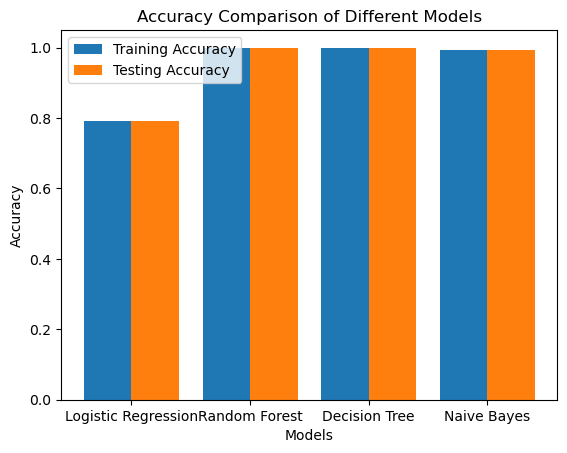

In [22]:
import numpy as np
import matplotlib.pyplot as plt

labels = ['Logistic Regression', 'Random Forest', 'Decision Tree','Naive Bayes']
training_accuracy = [training_accuracy_lr, training_accuracy_rf, training_accuracy_dt, training_accuracy_nb]
testing_accuracy = [testing_accuracy_lr, testing_accuracy_rf, testing_accuracy_dt, testing_accuracy_nb ]

x =np.arange(len(labels))

plt.bar(x-0.2, training_accuracy, 0.4, label='Training Accuracy')
plt.bar(x+0.2, testing_accuracy, 0.4, label='Testing Accuracy')


plt.xticks(x,labels)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Different Models")
plt.legend()
plt.show()



# Results

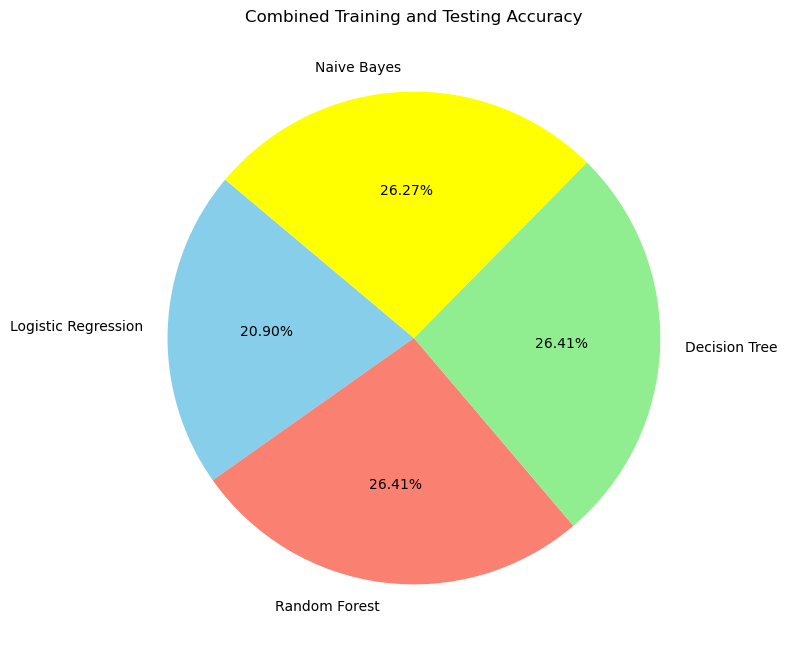

In [50]:
import numpy as np
import matplotlib.pyplot as plt



labels = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Naive Bayes']
combined_accuracy = [
    training_accuracy_lr + testing_accuracy_lr,
    training_accuracy_rf + testing_accuracy_rf,
    training_accuracy_dt + testing_accuracy_dt,
    training_accuracy_nb + testing_accuracy_nb
]

plt.figure(figsize=(8, 8))
plt.pie(combined_accuracy, labels=labels, autopct='%1.2f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen', 'yellow'])
plt.title('Combined Training and Testing Accuracy')
plt.show()


In [54]:
#combined accuries
logistic_regression_acc=training_accuracy_lr + testing_accuracy_lr
lr_acc=logistic_regression_acc/2*100
print("Logistic Regression (combined accuracies): ", lr_acc)

random_forest_acc=training_accuracy_rf + testing_accuracy_rf
rf_acc=random_forest_acc/2*100
print("Random Forest (combined accuracies): ", rf_acc)

decision_tree_acc=training_accuracy_dt + testing_accuracy_dt
dt_acc=decision_tree_acc/2*100
print("Decision Tree (combined accuracies): ", dt_acc)

naive_bayes_acc=training_accuracy_nb + testing_accuracy_nb
nb_acc=naive_bayes_acc/2*100
print("Naive bayes (combined accuracies): ", nb_acc)

Logistic Regression (combined accuracies):  79.12944269560171
Random Forest (combined accuracies):  99.97691820691838
Decision Tree (combined accuracies):  99.97351089460633
Naive bayes (combined accuracies):  99.4506533246575


# Conclusion

The main objective is to find the most suitable model for credit card fraud detection using machine learning techniques. The accuracies of four models were found and compared. The best model in terms of accuracy is Random Forest, which scored 99.976%. By using this model,  we can reduce the amount of credit card fraud.